## Importation of required librairies

In [14]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy	

In [15]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  

import os 


## Importation, loadind and understanting the data

In [16]:
# path of the dataset
dataset_name = "FraudDetectionDataset.csv"  
dataset_path = os.path.abspath(dataset_name)

#print("Chemin du fichier :", dataset_path)

In [17]:
data = pd.read_csv(dataset_path)
data.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                48480 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               48448 non-null  float64
 5   Device_Used                       48527 non-null  object 
 6   Location                          48453 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    48531 non-null  object 
 11  Fraudulent                        51000 non-null  int64  
dtypes: f

According to the output above, we have 51 000 entries, 0 to 50999, as well as 11 features. The "Non-Null Count" column shows the number of non-null entries. For the "Transaction_Amount ",  the count is 48480. Then there is missing values for that particular feature we must treat. The "Fraudulent" column is our target or response variable and the rest of the features are our predictor variables.

We also have a mix of numerical (5 int64 and 2 float64) and object data types(5). Noticed that this data has NaN values. 

In [19]:
data.isnull().sum()

Transaction_ID                         0
User_ID                                0
Transaction_Amount                  2520
Transaction_Type                       0
Time_of_Transaction                 2552
Device_Used                         2473
Location                            2547
Previous_Fraudulent_Transactions       0
Account_Age                            0
Number_of_Transactions_Last_24H        0
Payment_Method                      2469
Fraudulent                             0
dtype: int64

## Finding correlations 

In [28]:
data_features = data.select_dtypes(include = ['float64', 'int64'])
data_features



,User_ID,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent
0,4174,1292.76,16.0,0,119,13,0
1,4507,1554.58,13.0,4,79,3,0
2,1860,2395.02,NaN,3,115,9,0
3,2294,100.10,15.0,4,3,4,0
4,2130,1490.50,19.0,2,57,7,0
...,...,...,...,...,...,...,...
50995,2339,3112.51,15.0,0,7,8,0
50996,2152,2897.15,3.0,1,75,11,1
50997,3345,2204.43,18.0,3,73,5,0
50998,1518,4787.17,19.0,2,108,14,0


In [29]:
data_features_corr = data_features.corr()['Fraudulent'][:-1]
data_features_corr

User_ID                             0.008046
Transaction_Amount                  0.005507
Time_of_Transaction                 0.007035
Previous_Fraudulent_Transactions    0.001136
Account_Age                         0.006203
Number_of_Transactions_Last_24H    -0.003877
Name: Fraudulent, dtype: float64

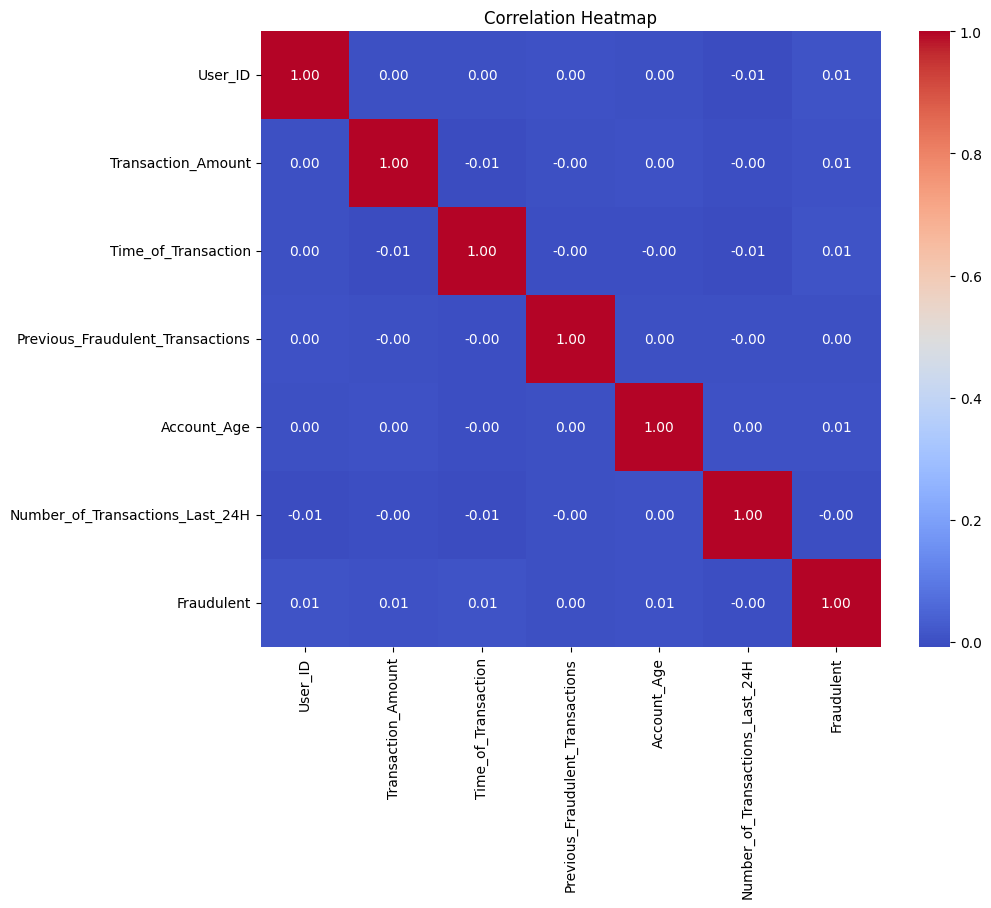

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

The correlation values are all close to 0, meaning none of these variables have a strong linear relationship with the target variable "Fraudulent."

This could indicate that these variables are not good predictors of fraud in this context, or that the relationship between these variables and fraud is non-linear. We will see.


## Data cleaning and feature engineering 